# Исследовать поведение итерационной последовательности при решении уравнения в комплексной плоскости методом Ньютона.

$$z^3 - 1 = 0$$
$$z_{n+1} = z_n - \frac{f(z)}{f'(z)}$$
$$f(z) = z^3 - 1$$
$$f'(z) = 3z^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
STEPS = 100
EPS = 1e-10

def f(z):
    return z**3 - 1

def f_der(z):
    return 3*z**2

def step(z):
    return z - f(z)/f_der(z)

def find_root_vect(initial):
    with np.errstate(divide='ignore', invalid='ignore'):
        z = initial
        for _ in range(STEPS):
            z = step(z)
        return z

In [3]:
ROOTS = [1, np.exp(2j * np.pi / 3), np.exp(-2j * np.pi / 3)]

def get_color_by_root(root):
    for i, true_root in enumerate(ROOTS):
            if np.abs(true_root - root) < EPS:
                return i
    return 3

get_colors_by_roots = np.vectorize(get_color_by_root)

In [4]:
from multiprocessing import Pool

def get_colors(initials):
    with Pool() as pool:
        roots = pool.map(find_root_vect, initials)
        return pool.map(get_colors_by_roots, roots)

In [42]:
from matplotlib.colors import ListedColormap, Normalize

def draw(x0, y0, x1, y1, resolution):
    x = np.linspace(x0, x1, resolution)
    y = np.linspace(-y1, -y0, resolution)
    xv, yv = np.meshgrid(x, y)
    res = get_colors(xv + 1j*yv)
    color_list = ['pink', 'violet', 'purple', 'red']
    plt.figure(figsize=(10, 10))
    plt.imshow(res, extent=(x0, x1, y0, y1), cmap=ListedColormap(color_list), norm=Normalize(0, 4))

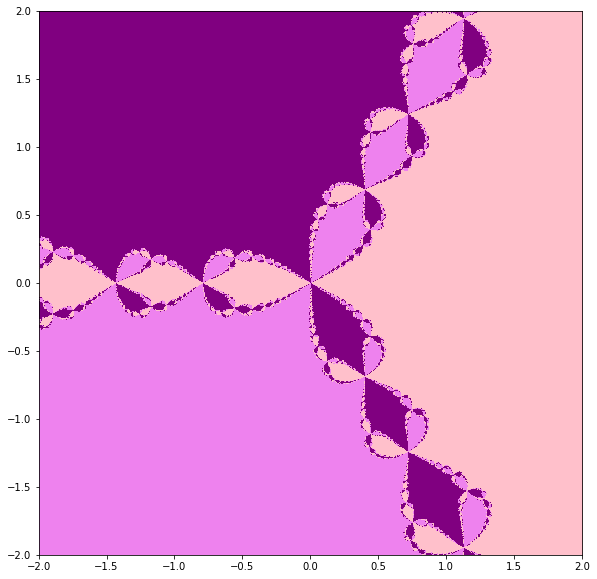

In [32]:
draw(-2, -2, 2, 2, 1000)

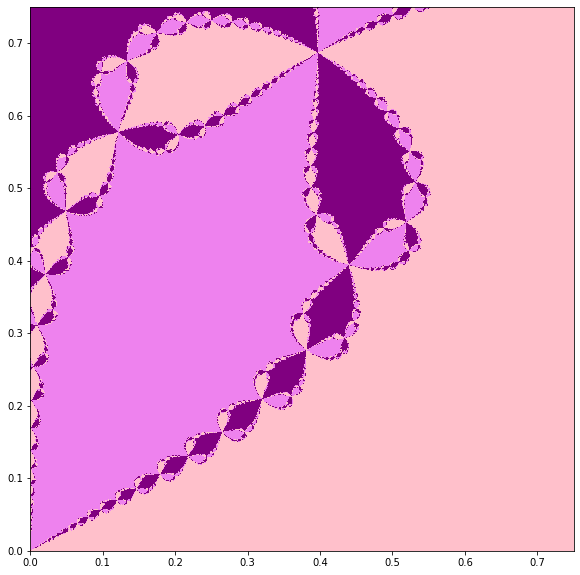

In [34]:
draw(0, 0, 0.75, 0.75, 1000)

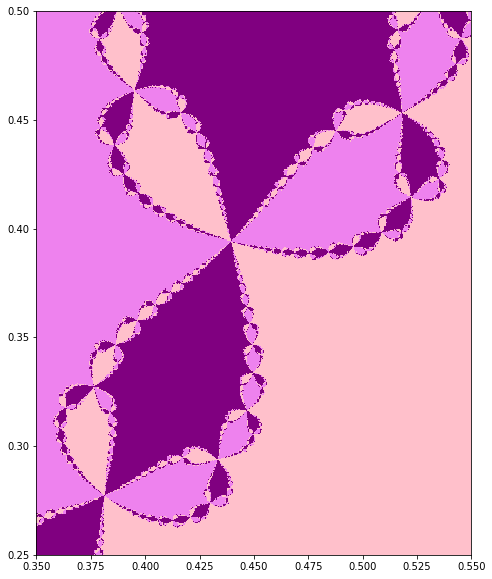

In [38]:
draw(0.35, 0.25, 0.55, 0.5, 500)

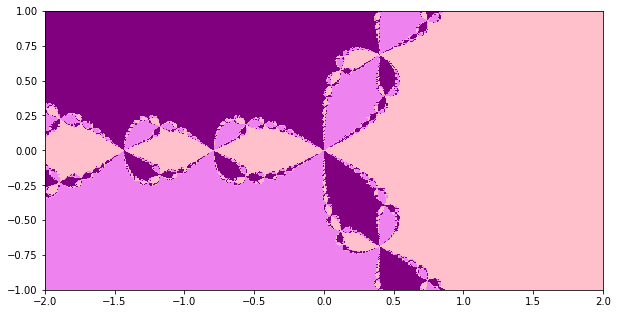

In [35]:
draw(-2, -1, 2, 1, 500)

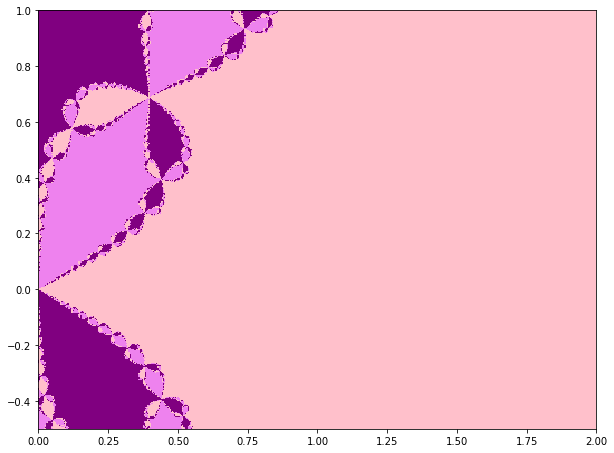

In [36]:
draw(0, -0.5, 2, 1, 500)